### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### Load the Digits Dataset

In [2]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X)
df['Target'] = y

### Standardize the Data

In [3]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dendrogram Plot

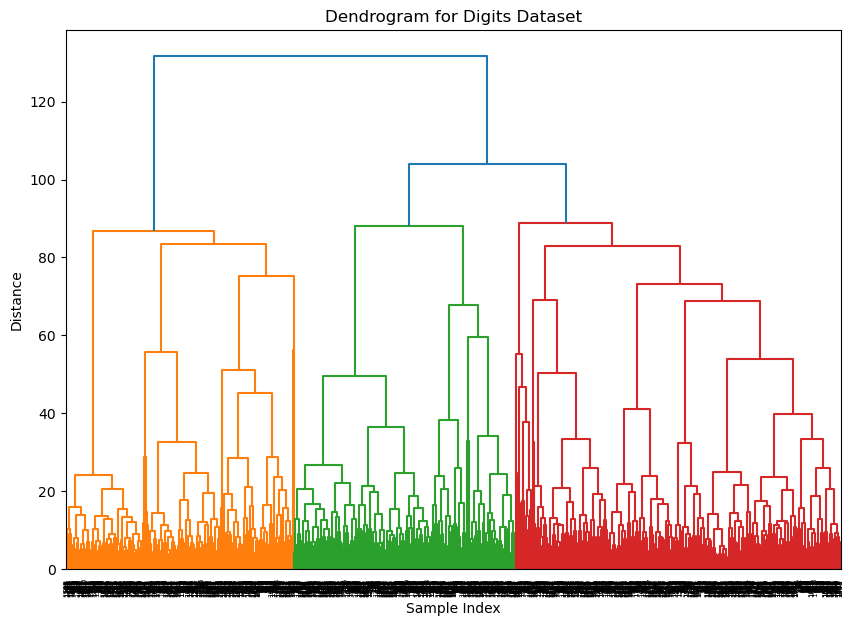

In [4]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Digits Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

### Agglomerative Clustering

In [5]:
# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=10, linkage='ward')  
y_pred = model.fit_predict(X_scaled)

# Add predicted labels to the dataframe
df['Cluster'] = y_pred


### Evaluate the Clustering

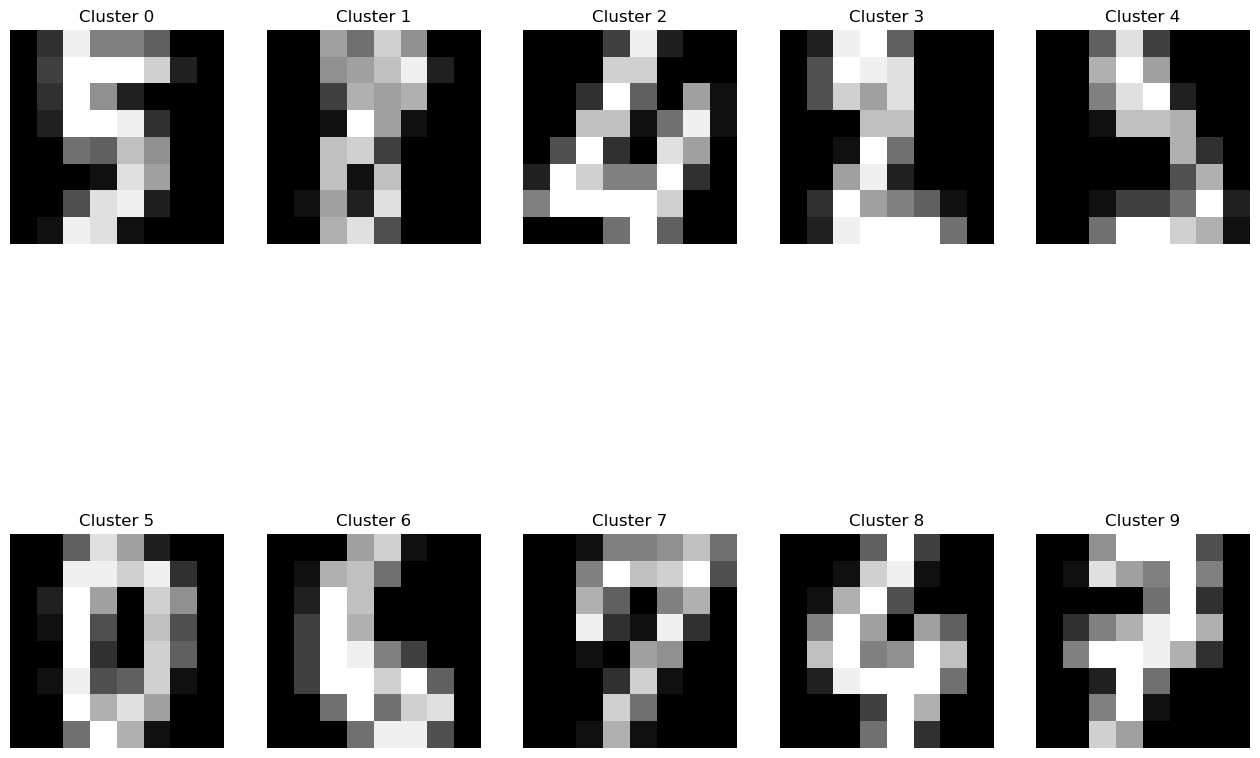

In [6]:
# Inverse transform the scaled data to its original range for visualization
X_original = scaler.inverse_transform(X_scaled)

# Visualize the clusters by plotting the first few images of each cluster
plt.figure(figsize=(16, 12))
for i in range(10):
    plt.subplot(2, 5, i+1)
    
    # Get the first 5 images of each cluster for visualization
    cluster_images = X_original[y_pred == i][:5]  # Show first 5 images of each cluster
    
    for j, img in enumerate(cluster_images):
        # Plot each image of the cluster
        plt.imshow(img.reshape(8, 8), cmap='gray')
        plt.axis('off')
    
    plt.title(f"Cluster {i}")
plt.show()